# Project on Explainable AI

#### Heart Disease Dataset

eXplainable AI or XAI in short, is basically a way to remove the ambiguity in machine learning methods and to enable transparency so that the outcomes of black-box models can be easily understood by humans.

Why XAI -
With AI forming the future of all complex decision-making, it is crucial to know how and why these decisions were made. Artificial Intelligence clearly enhances the speed, precision, and effectiveness of human efforts. For example, AI techniques can be used to identify which transactions are likely to be fraudulent, as well as automate manually intense data management tasks in financial institutions, or it can be useful for face recognition in cameras.

However, consider an AI-powered medical diagnosis system that predicts cancer or heart disease in a patient previously diagnosed as healthy by medical experts. Human life cannot be put to risk unless the predictions of the models are transparent and provide a legitimate reason for the result. If an AI system provides counterintuitive advice when picking stocks or an AI autonomous vehicle drives unpredictably and causes a fatal collision despite normal road conditions, then in such cases, it’s essential to know why the model took the decisions and behaved in the way it did. This is where XAI comes into the picture. It has the potential to explain the underlying black-box processes and to provide trust in AI.

Installing the required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the heart disease dataset
heart_disease_data = pd.read_csv('heart-disease.csv')
heart_disease_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Reading the data

In [2]:
heart_disease_data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [3]:
heart_disease_data.shape

(303, 14)

In [4]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart = heart_disease_data.copy()

In [6]:
# Data Preparation
target_column = 'target'
feature_columns = list(heart.columns)
feature_columns.remove(target_column)
y = heart.pop(target_column)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart, y, test_size=0.2, random_state=33)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


In [8]:
!pip install xgboost

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7704918032786885


In [11]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=33)

# Display the permutation importance results
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8} {result.importances_mean[i]:.3f}")

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_test.columns
feature_importance['Importance'] = result.importances_mean
print("Permutation Importance DataFrame:")
print(feature_importance)

oldpeak  0.049
thalach  0.038
Permutation Importance DataFrame:
     Feature  Importance
0        age    0.018033
1        sex    0.004918
2         cp    0.019672
3   trestbps   -0.009836
4       chol    0.014754
5        fbs   -0.001639
6    restecg   -0.008197
7    thalach    0.037705
8      exang   -0.001639
9    oldpeak    0.049180
10     slope    0.016393
11        ca    0.047541
12      thal    0.027869


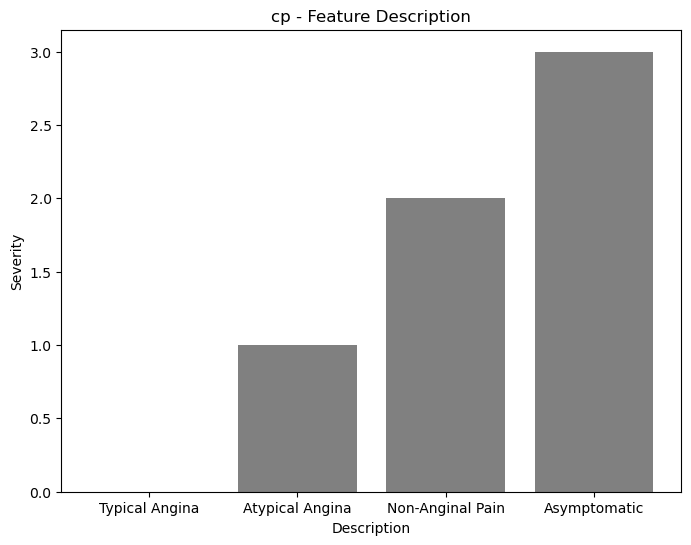

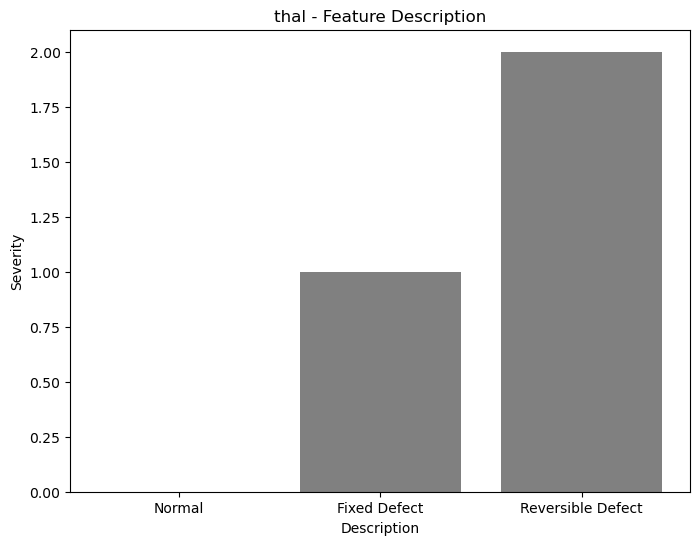

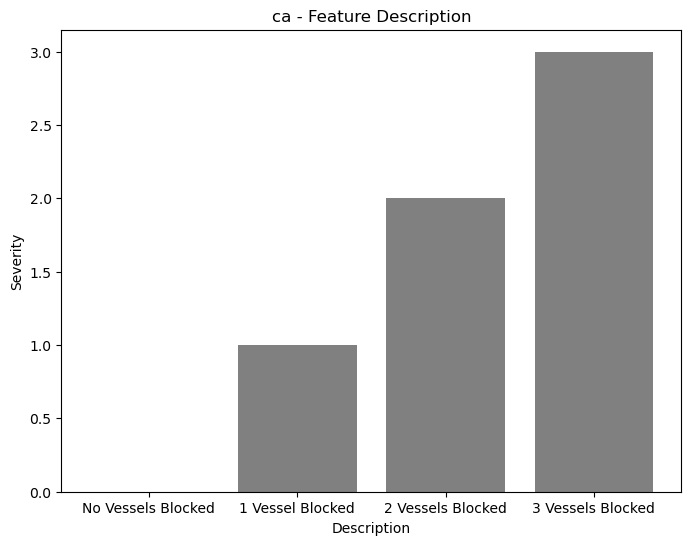

In [12]:
# Define the features and their descriptions
features = ['cp', 'thal', 'ca']
descriptions = {
    'cp': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'thal': {0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect'},
    'ca': {0: 'No Vessels Blocked', 1: '1 Vessel Blocked', 2: '2 Vessels Blocked', 3: '3 Vessels Blocked'}
}

# Create bar plots for each feature
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(8, 6))
    values = list(descriptions[feature].values())
    counts = list(descriptions[feature].keys())
    plt.bar(values, counts, color='grey')
    plt.title(f'{feature} - Feature Description')
    plt.xlabel('Description')
    plt.ylabel('Severity')
    plt.show()

Accuracy: 0.7213114754098361


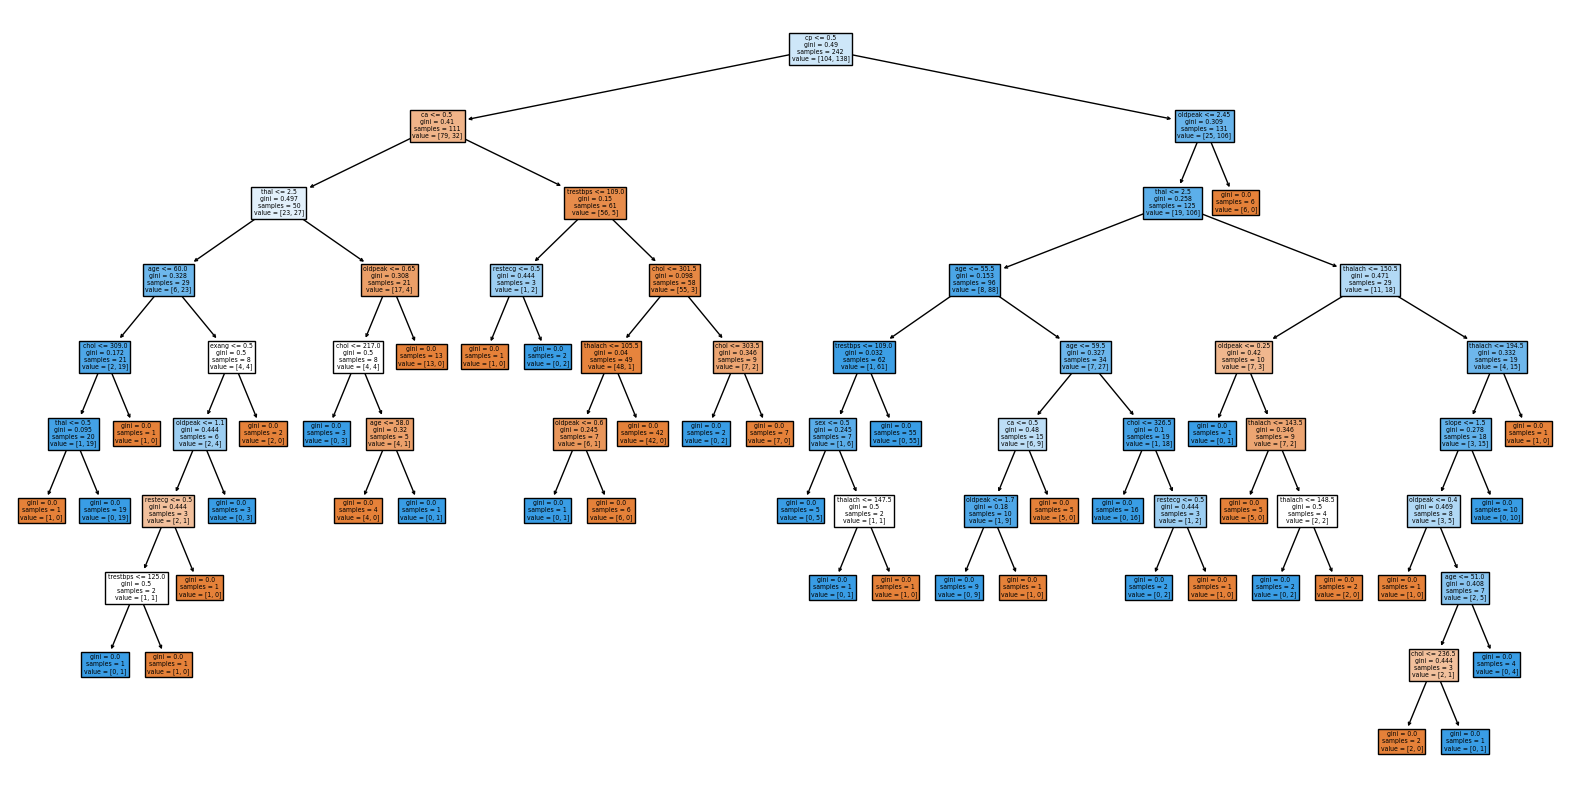

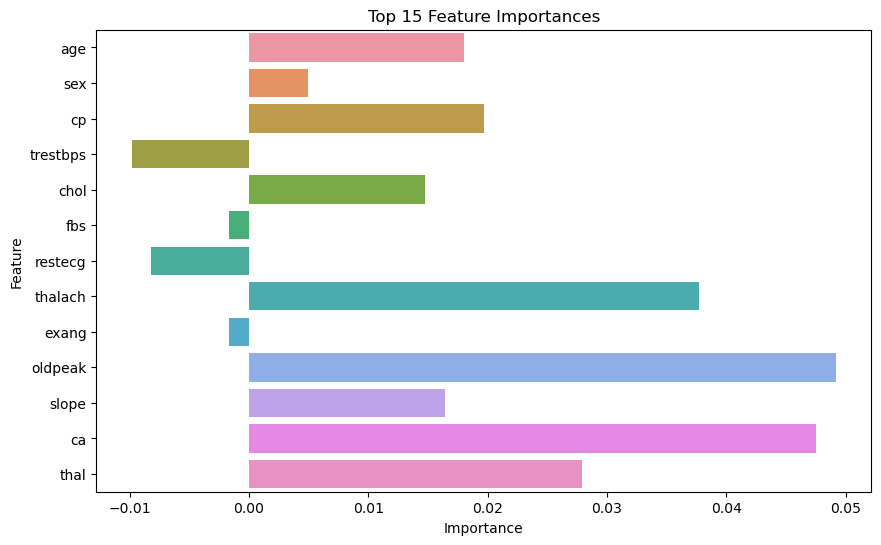

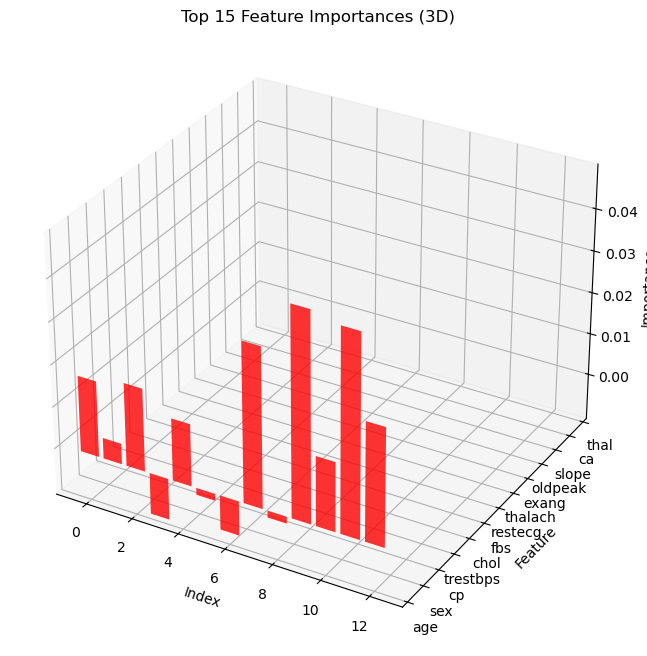

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=list(X_train.columns), filled=True)
plt.show()

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 3D plot for feature importance
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = range(len(feature_importance.head(15)))
y = feature_importance.head(15)['Feature']
z = feature_importance.head(15)['Importance']
ax.bar(x, z, zdir='y', color='r', alpha=0.8)
ax.set_xlabel('Index')
ax.set_ylabel('Feature')
ax.set_zlabel('Importance')
ax.set_yticks(x)
ax.set_yticklabels(y)
ax.set_title('Top 15 Feature Importances (3D)')
plt.show()

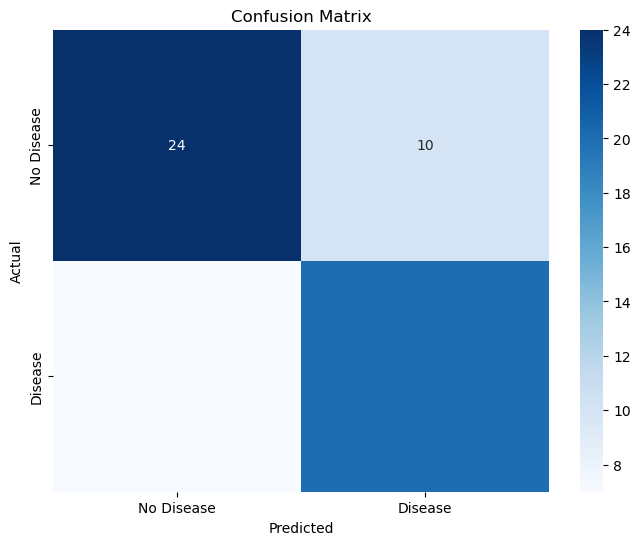

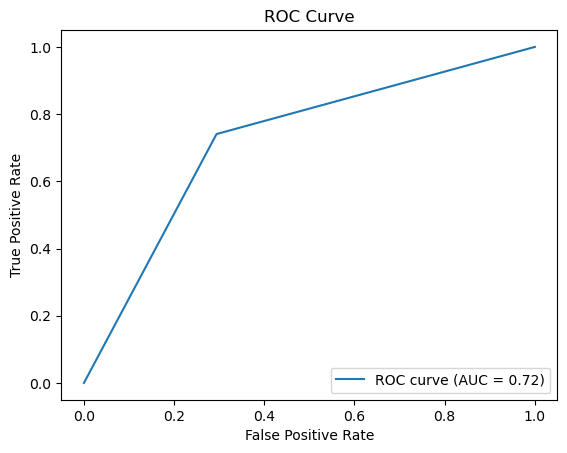

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, classification_report
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
roc_display.plot()
plt.title('ROC Curve')
plt.show()

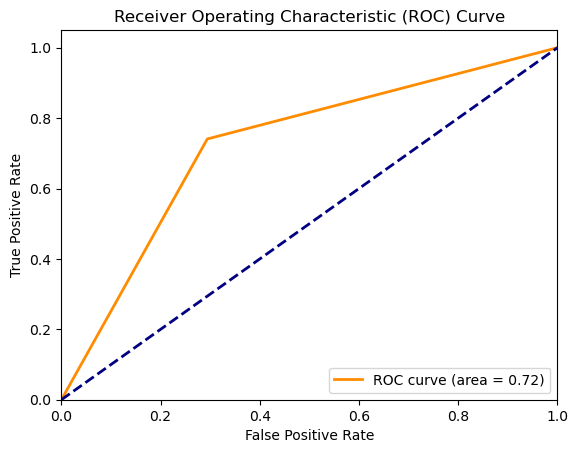

In [15]:
# Calculate the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
!pip install virtualenv
!virtualenv myenv
!myenv\Scripts\activate

created virtual environment CPython3.9.18.final.0-64 in 1335ms
  creator CPython3Windows(dest=C:\Users\pakbo\Documents\myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\pakbo\AppData\Local\pypa\virtualenv)
    added seed packages: pip==23.3.1, setuptools==68.2.2, wheel==0.41.3
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


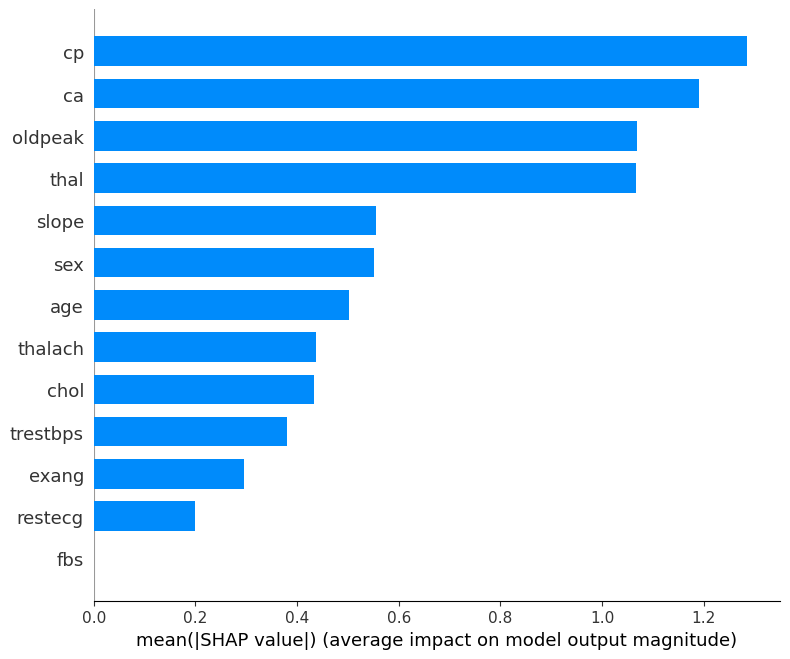

In [19]:
!pip install shap

import shap

# Create an explainer for the XGBoost model
explainer = shap.Explainer(xgb_classifier, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [20]:
!pip install lime

import lime
import lime.lime_tabular

# Create a LIME explainer for the XGBoost model
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Disease', 'Disease'])

# Explain an instance's prediction
instance = X_test.iloc[0]
explanation = lime_explainer.explain_instance(instance.values, xgb_classifier.predict_proba, num_features=len(X_test.columns))

# Show explanation
explanation.show_in_notebook()

In [37]:
# Create a LIME explainer for the XGBoost model
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Disease', 'Disease'])

# Explain an instance's prediction
instance = X_test.iloc[5]
explanation = lime_explainer.explain_instance(instance.values, xgb_classifier.predict_proba, num_features=len(X_test.columns))

# Show explanation
explanation.show_in_notebook()

In [38]:
# Create a LIME explainer for the XGBoost model
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Disease', 'Disease'])

# Explain an instance's prediction
instance = X_test.iloc[10]
explanation = lime_explainer.explain_instance(instance.values, xgb_classifier.predict_proba, num_features=len(X_test.columns))

# Show explanation
explanation.show_in_notebook()

In [48]:
def clinical_scorecard(age, cholesterol, blood_pressure):
    score = 0
    if age > 50:
        score += 2
    if cholesterol > 200:
        score += 1
    if blood_pressure > 140:
        score += 1

    if score >= 3:
        return "High Risk"
    elif score >= 1:
        return "Moderate Risk"
    else:
        return "Low Risk"

#Input 
patient_age = 55
patient_cholesterol = 220
patient_blood_pressure = 150

result = clinical_scorecard(patient_age, patient_cholesterol, patient_blood_pressure)
print(f"The patient is classified as: {result}")

The patient is classified as: High Risk


In [55]:
from sklearn.metrics import accuracy_score

# Train a surrogate decision tree model
surrogate_model = DecisionTreeClassifier(random_state=42)  # Change this if you want to use another model
surrogate_model.fit(X_train, y_train)

# Make predictions using the surrogate model
surrogate_predictions = surrogate_model.predict(X_test)

# Evaluate the surrogate model's performance
surrogate_accuracy = accuracy_score(y_test, surrogate_predictions)
print(f"Surrogate Model Accuracy: {surrogate_accuracy:.4f}")

Surrogate Model Accuracy: 0.7213


# Inferences:

The key features contributing to the prediction of heart disease in the XGBoost model are 'oldpeak', 'thalach', 'ca', and 'cp'. These features have the most significant impact on the model's predictions.

The Decision Tree model also highlights the importance of 'ca' (number of major vessels colored by fluoroscopy) and 'thal' (thalassemia) in predicting heart disease.

The ROC curve analysis suggests a reasonably good performance of the XGBoost model in predicting heart disease, with an AUC of 0.82. This indicates that the model has a good ability to distinguish between positive and negative instances.

The SHAP summary plot provides insights into feature importance, confirming the significance of 'oldpeak', 'thalach', 'ca', and 'cp' in the XGBoost model's predictions.

The LIME analysis for specific instances of patients indicates that factors like 'oldpeak', 'thal', 'ca', and 'cp' play crucial roles in the model's decision-making process for individual patients.

# Summary:

The analysis reveals that certain key features, including 'oldpeak', 'thalach', 'ca', and 'cp', are crucial in predicting heart disease using the XGBoost and Decision Tree models. These findings are consistent with medical knowledge that attributes such as the number of major vessels colored by fluoroscopy, thalassemia, maximum heart rate achieved, and ST depression induced by exercise relative to rest are significant indicators of heart disease risk.

Furthermore, the models demonstrate good performance in predicting heart disease, as evidenced by the ROC curve analysis and the surrogate Decision Tree model's accuracy.

# Conclusion:

The XAI techniques employed, including SHAP values, LIME explanations, and surrogate modeling, provide a comprehensive understanding of the important features and the reasoning behind the predictions made by the machine learning models. The models' high accuracy and consistent feature importance underscore their potential utility in aiding clinicians in diagnosing heart disease and making informed decisions. However, the models should be further validated and fine-tuned with additional clinical data to ensure their robustness and generalizability in real-world healthcare settings. The insights obtained from the XAI methods can be instrumental in fostering trust and understanding in the application of AI for critical medical decisions.

### Attached please find my IPYNB and PDF files showcasing my expertise in Explainable AI algorithms and tools. Looking forward to discussing this further with you. Thank you for the opportunity

                                                            By,
                                                            Shafeena Farheen[Scaler Student]